# # Marchenko redatuming with 3D dataset - GF's visualization at depth level

### Author: M.Ravasi

This notebook is used to visualize the Green's functions estimated at a chosen depth level for a grid of subsurface points produced by `Marchenko3D.py`.

These Green's functions are input of the subsequent step of source redatuming via MDD.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import dask.array as da
import pylops
import pylops_distributed

from scipy.sparse import csr_matrix, vstack
from scipy.linalg import lstsq, solve
from scipy.sparse.linalg import LinearOperator, cg, lsqr
from scipy import misc
from dask.distributed import Scheduler, Client

from pylops.utils.wavelets             import *
from pylops.utils.seismicevents        import *
from pylops.utils.tapers               import *

from pylops.utils import dottest
from pylops_distributed.utils import dottest as ddottest
from pylops_distributed.optimization.cg import cg as dcg
from pylops_distributed.optimization.cg import cgls as dcgls

In [2]:
os.environ["STORE_PATH"] = "/project/fsenter/mrava/Marchenko3D/"

In [3]:
subsampling = 4

Gplus = da.from_zarr(os.environ["STORE_PATH"] + 'Gplus_sub%d.zarr' % subsampling)
Gminus = da.from_zarr(os.environ["STORE_PATH"] + 'Gminus_sub%d.zarr' % subsampling)

In [4]:
Gplus

dask.array<from-zarr, shape=(601, 2451, 121), dtype=float32, chunksize=(601, 1225, 121)>

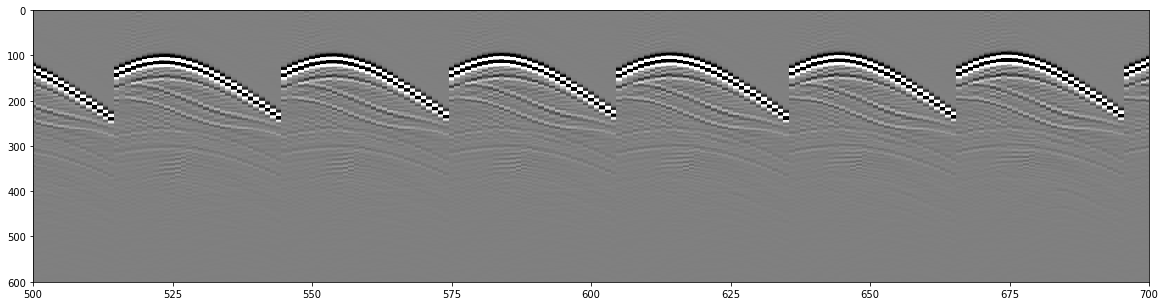

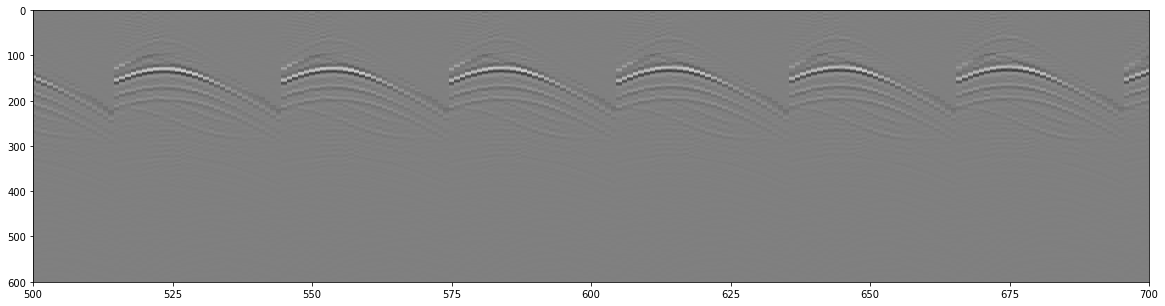

In [5]:
plt.figure(figsize=(20, 5))
plt.imshow(Gplus[..., 1], vmin=-5e-6, vmax=5e-6, cmap='gray')
plt.axis('tight')
plt.xlim(500, 700)

plt.figure(figsize=(20, 5))
plt.imshow(Gminus[..., 1], vmin=-5e-6, vmax=5e-6, cmap='gray')
plt.axis('tight')
plt.xlim(500, 700);

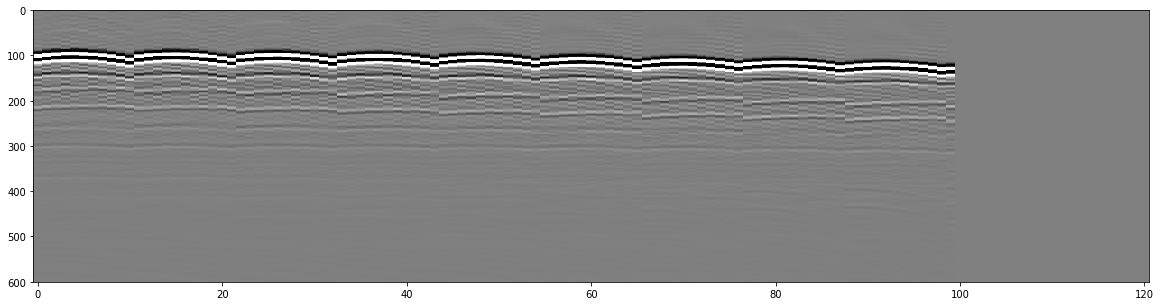

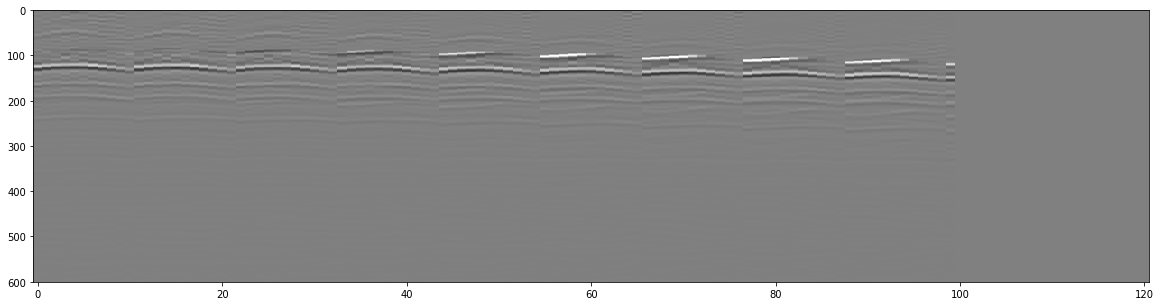

In [6]:
plt.figure(figsize=(20, 5))
plt.imshow(Gplus[:, 1400], vmin=-5e-6, vmax=5e-6, cmap='gray')
plt.axis('tight')

plt.figure(figsize=(20, 5))
plt.imshow(Gminus[:, 1400], vmin=-5e-6, vmax=5e-6, cmap='gray')
plt.axis('tight');